In [1]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp
import datetime
import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [19]:
cols = ['genCategory','category','name','lon','lat','checkIns','tips','users','createdAt','tileID','ID','query','time','verified','price','rating','tags','photoCount','description']

tokyo_path = "/Users/casy/Dropbox/CUSP/project/Square_cities/data/Tokyo_all.csv"
singapor_path = '/Users/casy/Dropbox/CUSP/project/Square_cities/data/Singapur_all.csv'
moscow_path = '/Users/casy/Dropbox/CUSP/project/Square_cities/data/Mosco_all.csv'

tokyo = pd.read_csv(tokyo_path, index_col=0, encoding='utf8')[cols]
singapor = pd.read_csv(singapor_path, index_col=0, encoding='utf8')[cols]
moscow = pd.read_csv(moscow_path, index_col=0, encoding='utf8')[cols]

In [33]:
def getPercentage(df):
    df['genCategory'].fillna('Unspecified', inplace=1)
    x = 100.0*df.groupby('genCategory').size()/len(df)
#     print len(df[pd.isnull(df.genCategory)])
#     print x.sum()
    return x

In [34]:
t = getPercentage(tokyo)
m = getPercentage(moscow)
s = getPercentage(singapor)

partition = pd.DataFrame({'Tokyo':t,'Moscow':m,'Singapor':s}).T

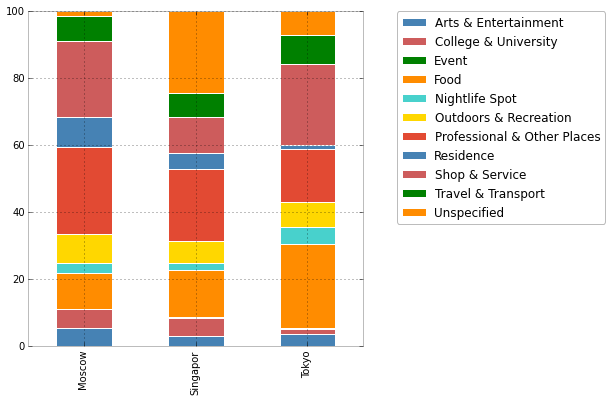

In [52]:
partition.plot(kind='bar',stacked=1, figsize=(6,6));
plt.legend(loc=(1.1,0.365))
plt.savefig('img/cities_comparison.png')